# Projet PEIP - Trader 

( Clément PASQUET )

## Principe :
### Créer une intelligence artificielle basique pour faire du trading.

Nous importons avec Pandas les listes des valeurs de certaines crypto-monnaies ( ada, bitcoin, monero ... )
et essayons de programmer différentes "stratégies", différentes facons de gagner de l'argent pour voir laquelle est la plus efficace.

Nous nous baserons sur les résultats de "StrategyOracle", qui est une stratégie, qui, par définition, peut voir le futur, 
et grâce à laquelle nous pourrons comparer les résultats des autres stratégies.

Ps : Ici la monnaie utilisé est l'ADA, le Cardano étant la blockchain de l'ADA.

## Graphiques :

Les graphiques qui vous seront montrés sont sensés représentés les différentes valeurs du "portefeuille" de la fonction.
Cependant, les fonctions qui n'achètent ou ne vendent très rarement comme ***StrategyLongTerm*** ou ***StrategyJanvier*** n'ont que très peu d'impacts sur le portefeuille et alors,
**les graphiques représentent les différentes valeurs de la crypto monnaie utilisé au fur et à mesure du temps.**

## Les Stratégies :

### StrategyLongTerm

En premier nous avons la StrategyLongTerm. 

Son But ? Vendre exactement 100 jours après le début de la cryptomonnaie.

Ainsi, comme on peut voir que le .csv commence le **1er octobre 2017** nous savons que nous allons acheter des actions le **mardi 09 janvier 2018**.

Voici le code : 

```python
class StrategyLongTerm(IStrategy):

    def __init__(self,name="StrategyLongTerm"):
        super().__init__()

    def getAction(self, game, unityPrice, date, debug=False):
        
        if game.clock == 100 :
            return game.SELL, (game.account.security)

        return 0, (game.account.cash//unityPrice)
```

`game.clock` étant tout simplement un attribut interne qui va compter les jours, 

on va faire une condition simple : si on est le 100e jour ( aka, le 09/01/2018 ), on vend,

et sinon, on achète.

( en pratique, vu qu'on démarre au jour 1, on achète le 1er octobre 2017, et on vend finalement le 09 janvier 2018. )

## Tester le code :


Le gain est de : [2123.06990247951] 



Statistiques de notre liste 'gain' :
 count    1782.000000
mean      483.429704
std       577.937243
min       -83.172094
25%       -34.391894
50%       311.851423
75%       891.120771
max      3241.860109
dtype: float64


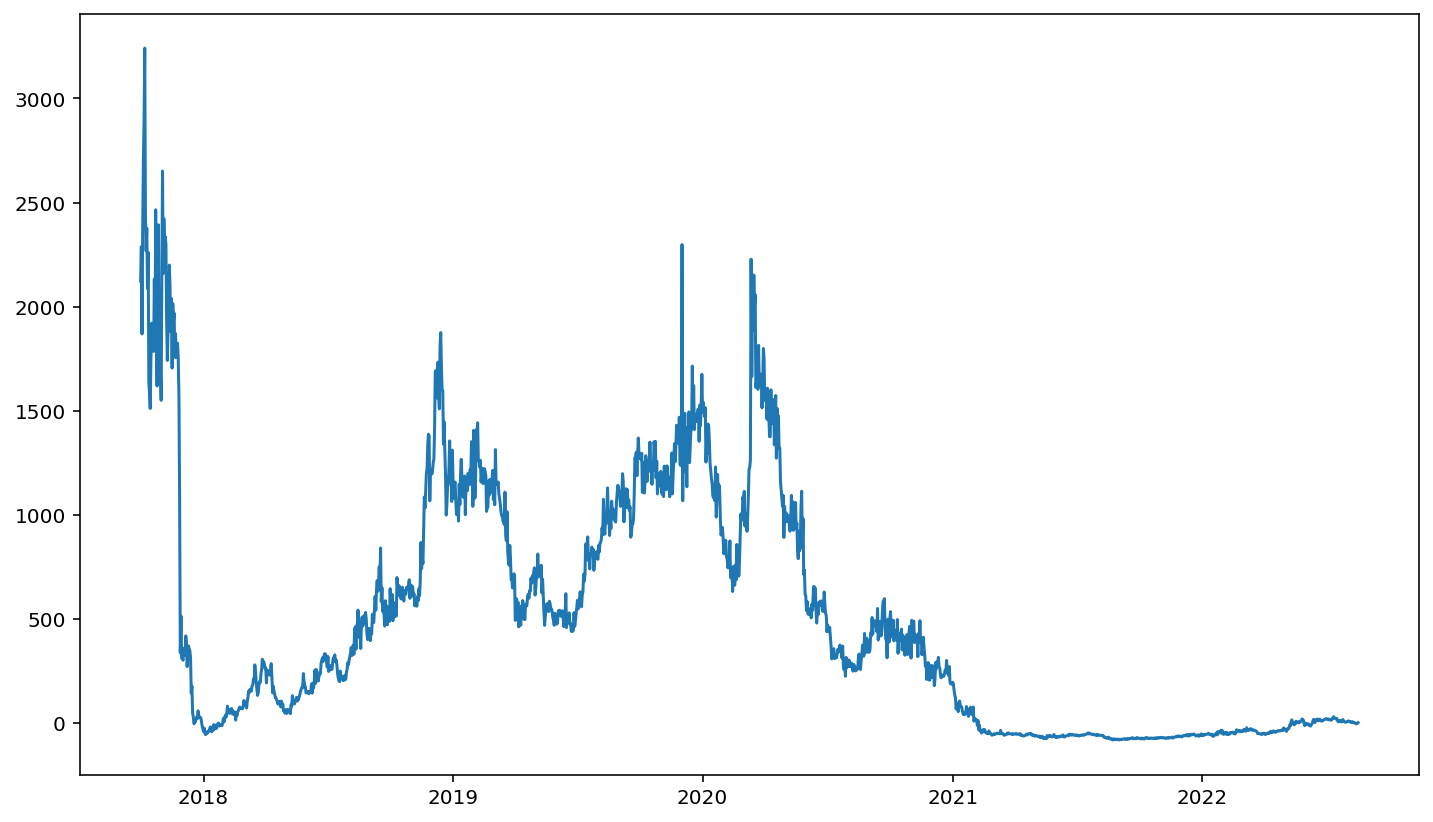

In [1]:
import random
import matplotlib.pyplot as plt
%run -i "Loader.ipynb"
%run -i "BaseClasses.ipynb"
%run -i "Strategies.ipynb"

loader = Loader()
loader.loadSource(Loader.COINCODEX, forceEqualDate=True)
df = loader.get(Loader.COINCODEX, Loader.ADA)
serie = df.Open
strategy = StrategyLongTerm()
evalGame = EvalGame(100)

gain1 = evalGame.eval(serie, strategy, iteration=100, debug=False)
print("Le gain est de :" , gain1, "\n")

gain = evalGame.evalTime(serie, strategy, iteration=100, debug=False)

print("Statistiques de notre liste 'gain' :\n", gain.describe(include='all'))
plt.plot(gain)
plt.show()

### Résultat :

Ici, la strategy LongTerm ne fonctionne qu'une seule fois, plus exactement *100 jours après le début de la crypto monnaie utilisé*.

C'est pour cela que le graphique que l'on voit ne représente pas vraiment le portefeuille de la stratégie, mais plutôt *l'évolution du prix de l'ada*.

Mais nous pouvons quand même remarquer que cette méthode a un gain de 2123, ce qui est beaucoup pour une stratégie qui repose principalement sur le hasard,
mais c'est une coincidence très probablement due au fait que au même moment, en janvier, l'ada avait perdu une grande partie de sa valeur avant de la récupérer plus tard.

### StrategyRandom

Le But ? choisir entre Acheter, Vendre & Rien faire de manière aléatoire !

Cette classe ce repose sur **random** qui est une bibliothèque permettant de donner des chiffres aléatoires.

```python
class StrategyRandom(IStrategy):

    def __init__(self,name="StrategyRandom"):
        super().__init__()

    def getAction(self, game, unityPrice, date, debug=False):

        return (random.randint(0,2)), (random.randint(0,1) * unityPrice)
```

Nous utilisons cela pour choisir notre action, 

`random.randint(0,2)` permettant de choisir entre acheter, vendre et rien faire, et

`random.randint(0,1)` nous permettant d'avoir, soit 0, soit 1 aléatoirement,  et tout cela multiplié par le prix d'une action.

Autrement, on décide aléatoirement, d'acheter ou ne pas acheter une action.


Le gain est de : [-9.34917026441751] 



Statistiques de notre liste 'gain' :
 count    1782.000000
mean      -13.597983
std        16.812292
min       -75.618401
25%       -22.855472
50%        -9.177799
75%        -1.067816
max        30.069796
dtype: float64


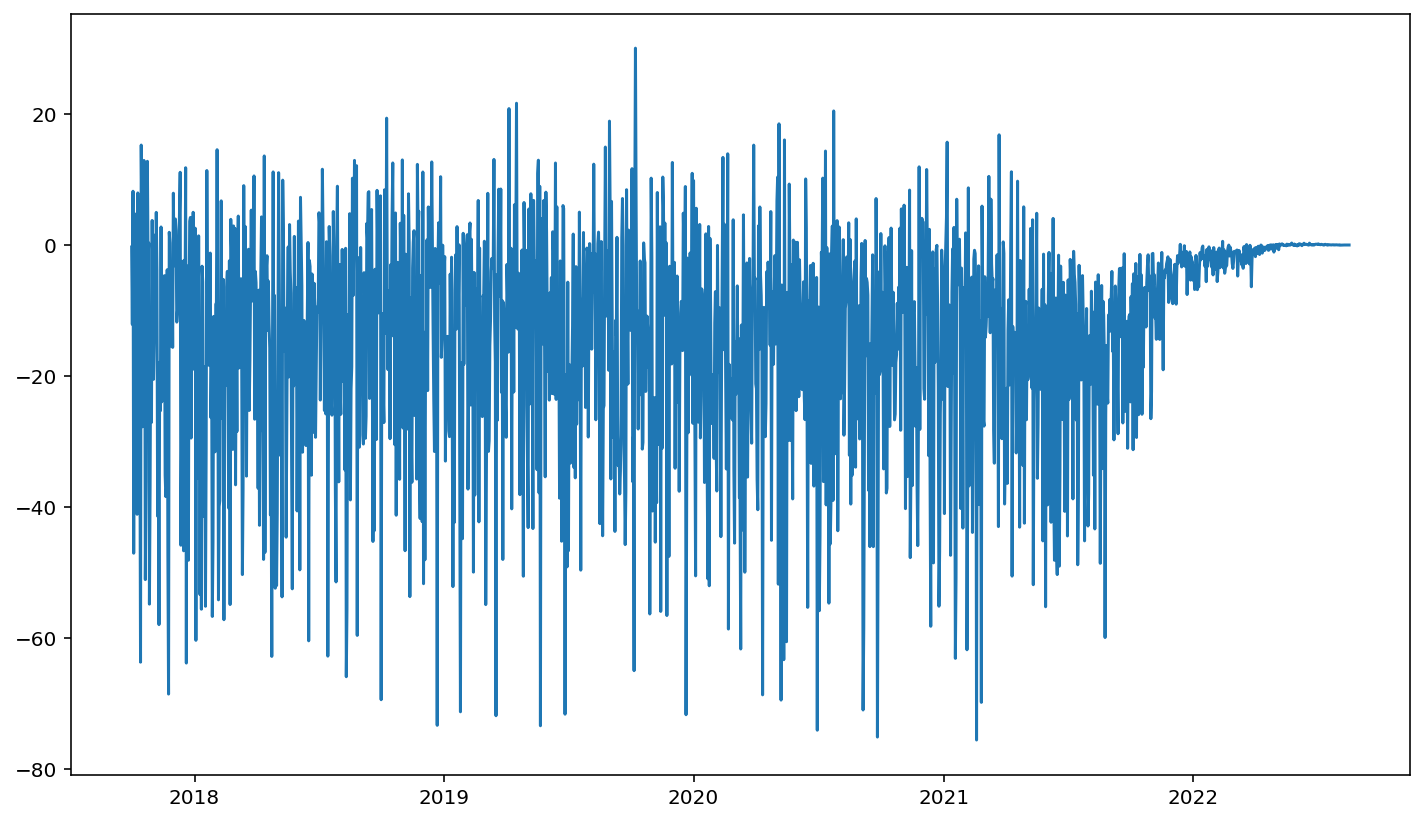

In [2]:
strategy = StrategyRandom()
evalGame = EvalGame(100)


gain2 = evalGame.eval(serie, strategy, iteration=100, debug=False)
print("Le gain est de :" , gain2, "\n")

gain = evalGame.evalTime(serie, strategy, iteration=100, debug=False)


print("Statistiques de notre liste 'gain' :\n", gain.describe(include='all'))
plt.plot(gain)
plt.show()

### Résultat :

Nous pouvons voir que notre graphique nous donne une belle courbe bien chaotique.

Et cette courbe aura des minimums ( ~  -70 en général ), des maximums ( ~ 30 à peu près ) et une moyenne qui sera en général négative et proche de -10.

A noter que cette stratégie est **la seule** ( avec CoinToss ), à être purement aléatoire, et donc, à avoir un résultat qui changera à chaque exécution.

C'est pour cela que les valeurs de minimum et de maximum ne sont qu'indicatif vu qu'il est tout à fait possible, d'avoir, un jour, une exécution qui donne un résultat absurdement bas ou haut.

### StrategyOracle

C'est la stratégie qui servivra de base pour la comparer aux autres.

Le But ? Deviner le futur pour choisir de l'action à faire !

Si l'action va baisser, on vend, et si elle augmente, on achète.

C'est la stratégie la plus rentable, car c'est **la** manière de gagner le plus d'argent et de très loin.

```python
class StrategyOracle(IStrategy):
    
    def __init__(self,name="StrategyOracle"):
        super().__init__()


    def getAction(self, game, unityPrice, date, debug=False):
        if (game.clock) < ((len(game.prices))-1) :

            if game.prices[game.clock+1] >unityPrice :
                return (game.BUY, (game.account.cash//unityPrice))

            if game.prices[game.clock+1] <unityPrice :
                return (game.SELL, (game.account.security))

        if game.clock >= len(game.prices)-1 :
            return (game.SELL, (game.account.cash//unityPrice))
        return (2, game.account.security)
        
        pass
```

Ici on va regarder si le prix actuelle `unityPrice` est plus bas ou plus haut que le prix de demain `game.prices[game.clock+1]`.

Si le prix de demain est plus haut, on achète tout de suite autant d'action que le portefeuille peut le permettre `return (game.BUY, (game.account.cash//unityPrice))`.

Si le prix de demain est plus bas, on vend tout de suite toutes nos actions ` return (game.SELL, (game.account.security))`.

<br/><br/>
Et on rajoute deux "Gardes fous" pour éviter d'avoir des erreurs style `OutOfBound` 

avec `if (game.clock) < ((len(game.prices))-1)` pour vérifier que l'on peut belle et bien vérifier le prix de demain

et 

`if game.clock >= len(game.prices)-1 :
            return (game.SELL, (game.account.cash//unityPrice))`

qui va vendre toutes les actions si on arrive au "dernier jour".



Le gain est de : [1.4236874910839969e+20] 



Statistiques de notre liste 'gain' :
 count    1.782000e+03
mean     2.231417e+18
std      1.373849e+19
min      0.000000e+00
25%      3.380464e+05
50%      9.879357e+10
75%      2.035720e+14
max      1.442117e+20
dtype: float64


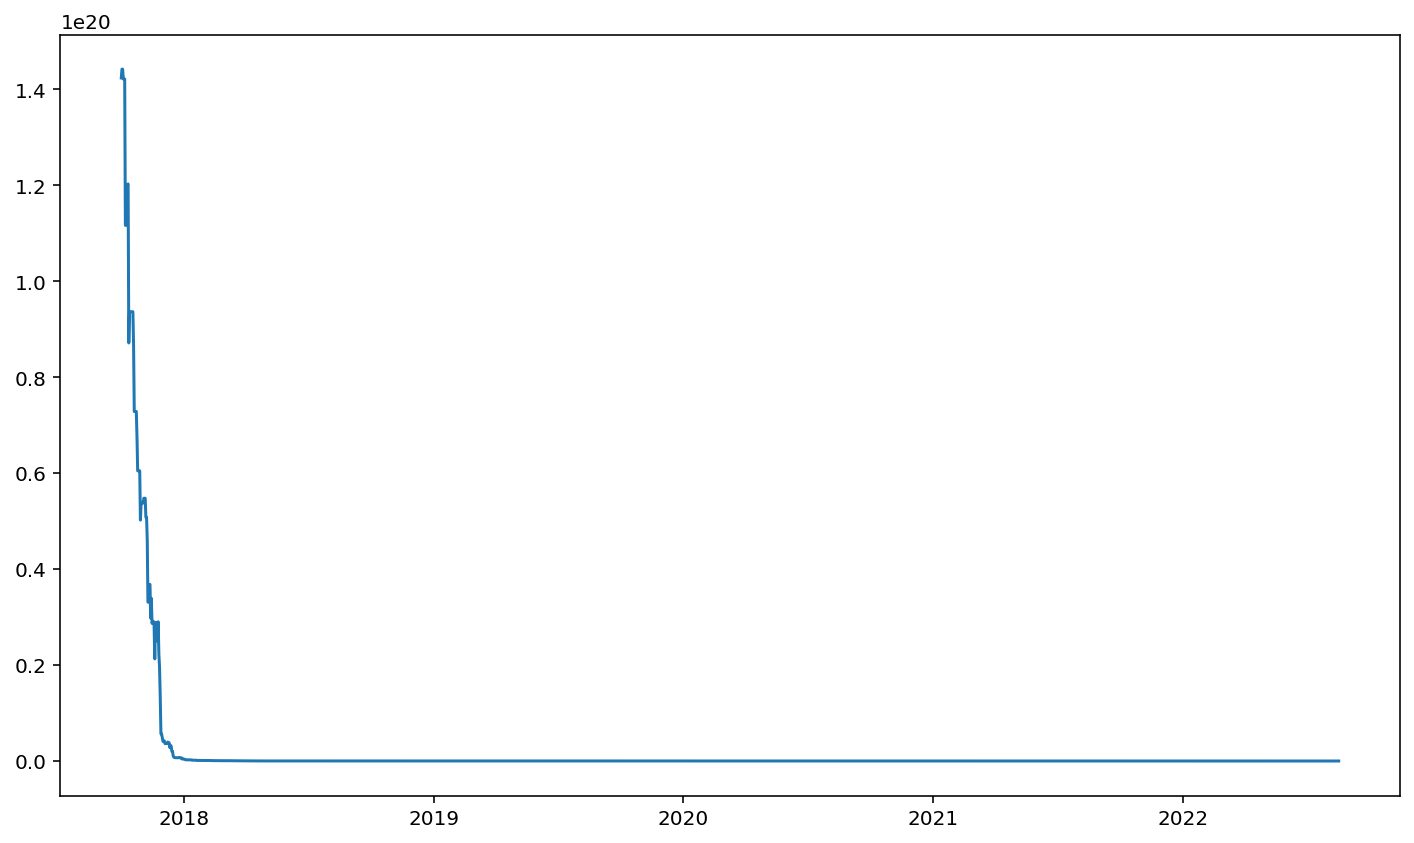

In [3]:
strategy = StrategyOracle()
evalGame = EvalGame(100)

gain3 = evalGame.eval(serie, strategy, iteration=100, debug=False)
print("Le gain est de :" , gain3, "\n")

gain = evalGame.evalTime(serie, strategy, iteration=100, debug=False)

print("Statistiques de notre liste 'gain' :\n", gain.describe(include='all'))
plt.plot(gain)
plt.show()

### Résultat

Notre stratégie fonctionne exponentiellement bien, avec un résultat de **1.4 puissance 20**.

C'est tout à fait normale puisque qui dit prédire le futur dit pouvoir acheter ou vendre au bon moment, et donc, maximiser le profit.

Et encore, ici la stratégie ne cherche le profit que le jour pour le lendemain, je penserais que si cette même fonction pouvait prédire le future à court, moyen & long terme, cela augmenterait encore plus les possibilitées de cette stratégie.


### StrategyJanvier

La StrategyJanvier se base sur un effet bien réel : l'effet janvier.

C'est la conséquence du fait que en décembre, de nombreux traders vendent leur actions les moins rentables, ce qui à tendance à faire baisser les prix du marchés au mois de décembre.

Et en janvier, d'autres traders rachètent en masse ces actions beaucoup moins chère en espérant faire du bénéfice, et ainsi, les prix s'emballent.


```python
class StrategyJanvier(IStrategy) :

    def __init__(self, name="StrategyJanvier"):
        self.name = name

    def isRandom(self):
        return False

    def getAction(self, game, unityPrice, date, debug=False):
        
        date = str(game.dates[game.clock])
        if date[5] == '3' and date[6] == '0' and date[8] == '0' and date[9] == '1' :
            return game.SELL, (game.account.security)
        return 0,(game.account.cash//unityPrice)
        pass

    def getName(self):
        '''
        @return the name of the strategy
        '''
        return self.name
```

Ici, nous vérifions principalement que nous sommes en janvier.

Pour faire cela, nous utilisons  `game.dates[game.clock]` qui va donner la date actuelle sous forme YYYY-DD-MM.

Et si le **6e et le 7e élément sont égales à 3 0** & que les **9e et 10e éléments sont égales à 0 1**, cela veut dire que nous sommes le 30 janvier, en plein milieu de l'effet janvier !

Et ainsi, nous vendons.

Et le reste du temps, quelque soit la date, on achète.

Le gain est de : [2053.1783488955807] 



Statistiques de notre liste 'gain' :
 count    1782.000000
mean      482.511239
std       573.203643
min       -81.656911
25%       -33.285774
50%       309.400056
75%       888.025525
max      2816.075647
dtype: float64


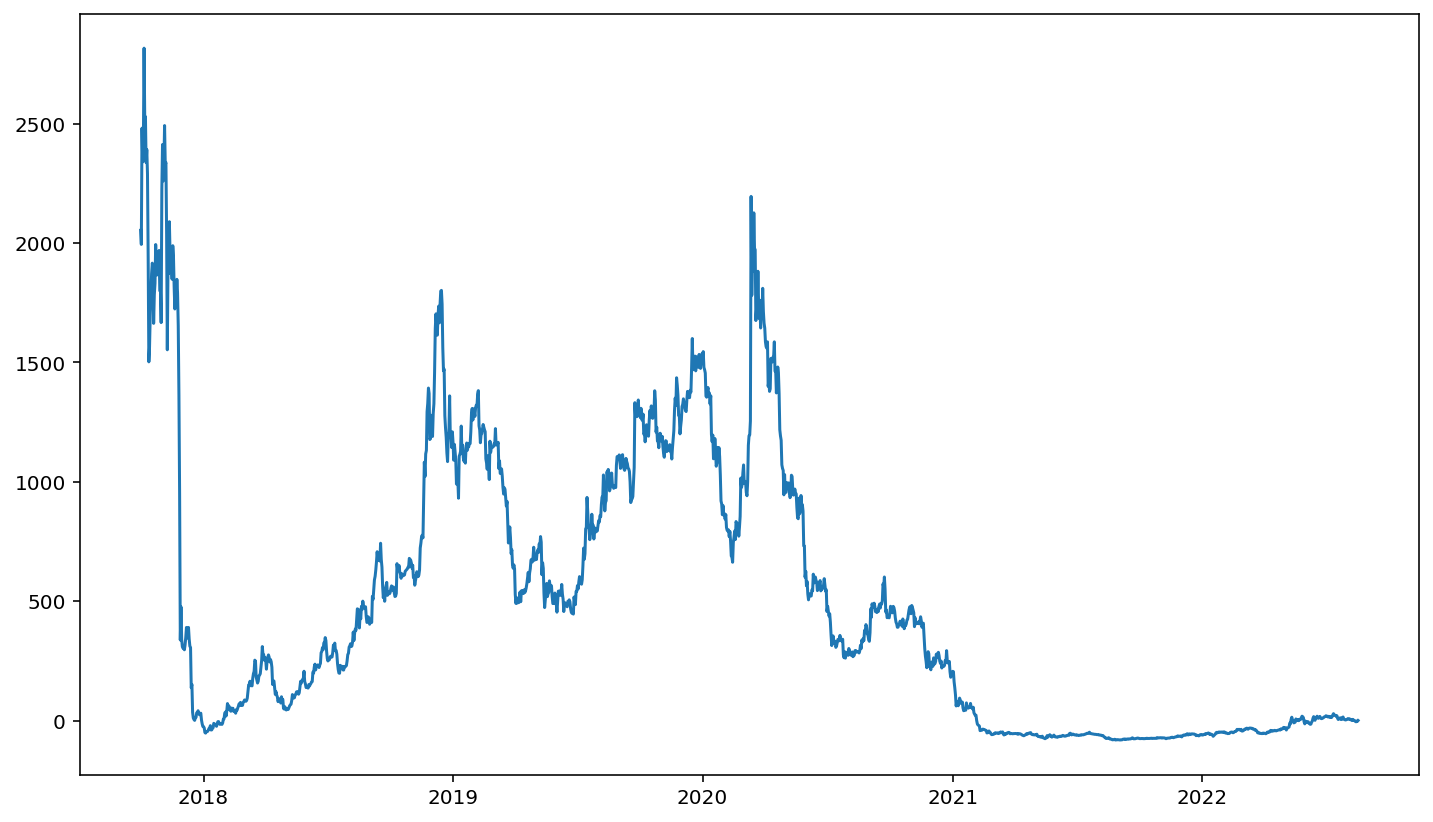

In [4]:
strategy = StrategyJanvier()
evalGame = EvalGame(100)

gain4 = evalGame.eval(serie, strategy, iteration=100, debug=False)
print("Le gain est de :" , gain4, "\n")

gain = evalGame.evalTime(serie, strategy, iteration=100, debug=False)
print("Statistiques de notre liste 'gain' :\n", gain.describe(include='all'))

plt.plot(gain)
plt.show()

### Résultat

Notre gain est de 2053, ce n'est pas énorme, mais représente quand même une amélioration.

Nous pourrions supposer que l'effet janvier fonctionne moins qu'attendu, peut être à cause du fait que l'effet janvier fonctionne particulièrement bien pour les actions, qui sont gérées par des traders qui, pour payer moins de taxes "vident" leur portefeuille des actions les moins intéressantes avant qu'on ne les inspecte pour les taxer.

Et que donc, sur une cryptomonnaie, l'impacte est moindre.

Nous pouvons également remarquer que nous voyons le graphique de la valeur de l'ADA au cours du temps, indiquant que notre stratégie n'a pas eu d'impacts significatifs sur les prix ( ce qui est plutôt logique vu qu'elle n'est utilisé qu'une fois par an ).

### StrategyCoinToss

Dans la lignée de StrategyRandom, ici, tout se joue au pile ou face !

La stratégie va forcément acheter ou vendre, mais ne peut pas ne rien faire.

```python
import random
class StrategyCoinToss(IStrategy):

    def __init__(self,name="StrategyCoinToss"):
        super().__init__()

    def getAction(self, game, unityPrice, date, debug=False):        
        return (random.randint(0,1)), (random.randint(0,1) * unityPrice)
```

Son fonctionnement est le même que précédemment, `(random.randint(0,1)` va donner soit 0, soit 1, chiffre qui va donc etre utilisé pour décider quoi faire.

Et ensuite on choisit aléatoirement si on doit acheter une action ou non.

Le gain est de : [-33.7002240589503] 



Statistiques de notre liste 'gain' :
 count    1782.000000
mean      -16.163438
std        18.910250
min       -73.859082
25%       -26.392917
50%       -11.060806
75%        -1.696803
max        30.429261
dtype: float64


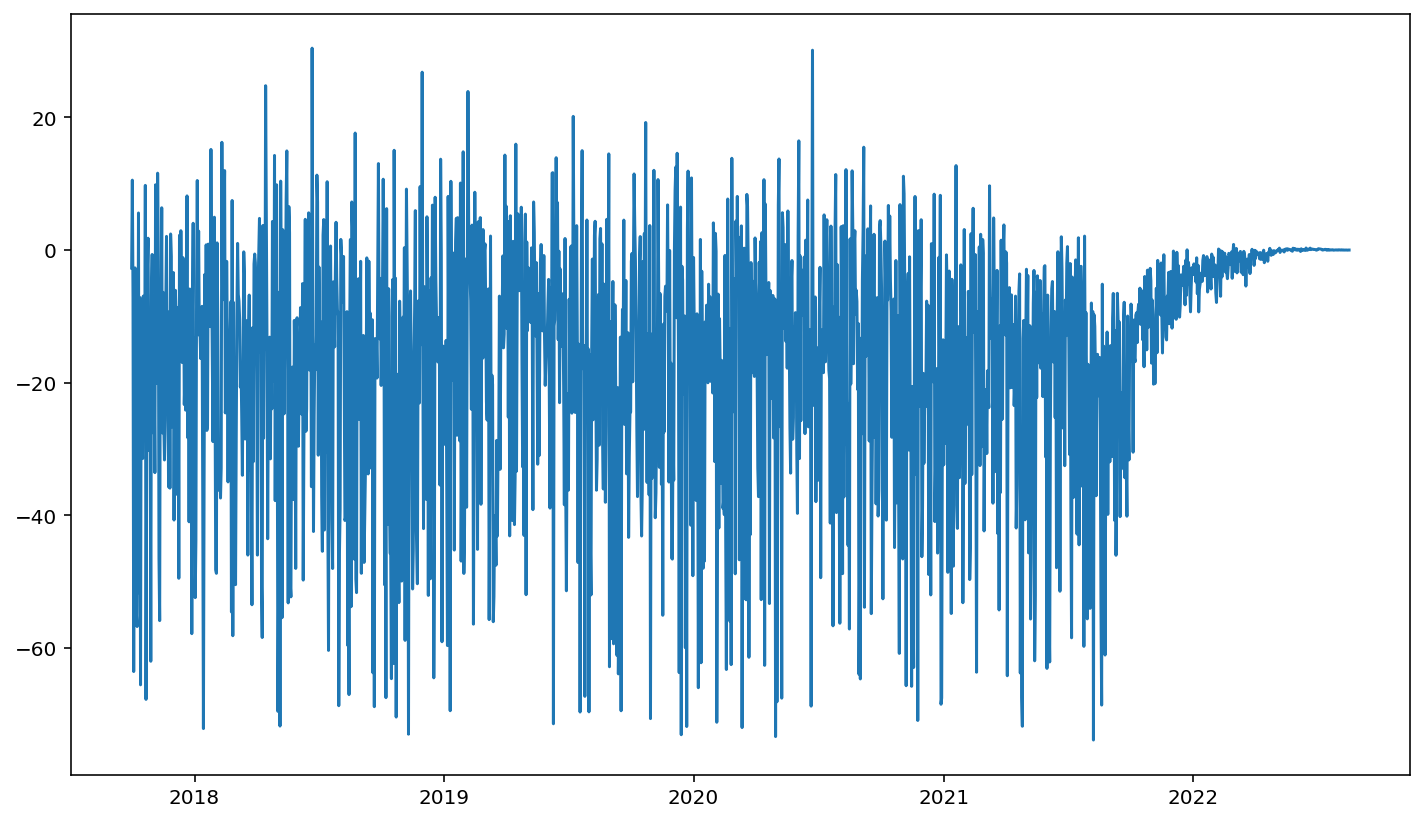

In [5]:
strategy = StrategyCoinToss()
evalGame = EvalGame(100)

gain5 = evalGame.eval(serie, strategy, iteration=100, debug=False)
print("Le gain est de :" , gain5, "\n")

gain = evalGame.evalTime(serie, strategy, iteration=100, debug=False)

print("Statistiques de notre liste 'gain' :\n", gain.describe(include='all'))
plt.plot(gain)
plt.show()

### Résultat :

Pas de doute, le résultat est très ressemblant à StrategyRandom !

On pourrait penser penser que le graphique serait différent, puisqu'ici on ne peut pas ne rien faire ( avec STILL ).

Mais les minimums et maximums sont toujours plus ou moins pareil ( -74 et 31 à la première exécution );

et la moyenne est toujours négatifs et proche des résultats de StrategyRandom ( -16 à la 1ère exécution )

### StrategyTenkanSen

Une des stratégies les plus complexes !
Le Principe ? 
Calculer la moyenne des valeurs d'une action sur une durée longue ( ici, 9 jours ) pour déterminer si le marché est en hausse ou en baisse.

Si la "moyenne" des prix des 9 derniers jours est plus basses que le prix actuel, on achète, ca veut dire que le prix va surement augmenter dans le futur.

Et si le Tenkan, si la moyenne des 9 derniers jours est plus hautes que le prix actuel, on vend, parceque le prix risque encore de baisser.

```python
class StrategyTenkanSen(IStrategy):

    def __init__(self,name="StrategyTenkanSen"):
        super().__init__()

    def getAction(self, game, unityPrice, date, debug=False):
        listTemp = []

        for i in range(9) :
            try :
                listTemp.append(game.prices[abs(game.clock-i)])
            except :
                continue
        minimum = min(listTemp)
        maximum = max(listTemp)
        tenkan = (maximum + minimum) / 2

        if tenkan < unityPrice :
            return (game.BUY, (game.account.cash//unityPrice))

        if tenkan > unityPrice :
            return (game.SELL, (game.account.security))

        return (2, game.account.security)
```
La partie avec une boucle `for i in range(9) ` sert tout simplement à vérifier si on a le droit d'accéder à la valeur de l'action il y a 9 jours.


C'est pour cela que l'on va essayer; que l'on va "try" de voir les prix des 9 derniers jours, et si on arrive pas à accéder à la valeur en question, cela veut dire que nous essayons d'accéder à des valeurs qui n'existe pas, et donc, nous continuons l'exécution de notre programme.

Et ensuite nous calculons `tenkan`, qui représente la moyenne de l'addition de la valeur maximum et minimum, ce qui nous permettra plus tard, de choisir si nous devons acheter ou vendre.

Le gain est de : [14841.661125211798] 



Statistiques de notre liste 'gain' :
 count     1782.000000
mean      1277.744386
std       3265.578762
min        -59.750365
25%        -10.914091
50%        766.069224
75%       1308.348472
max      29050.019226
dtype: float64


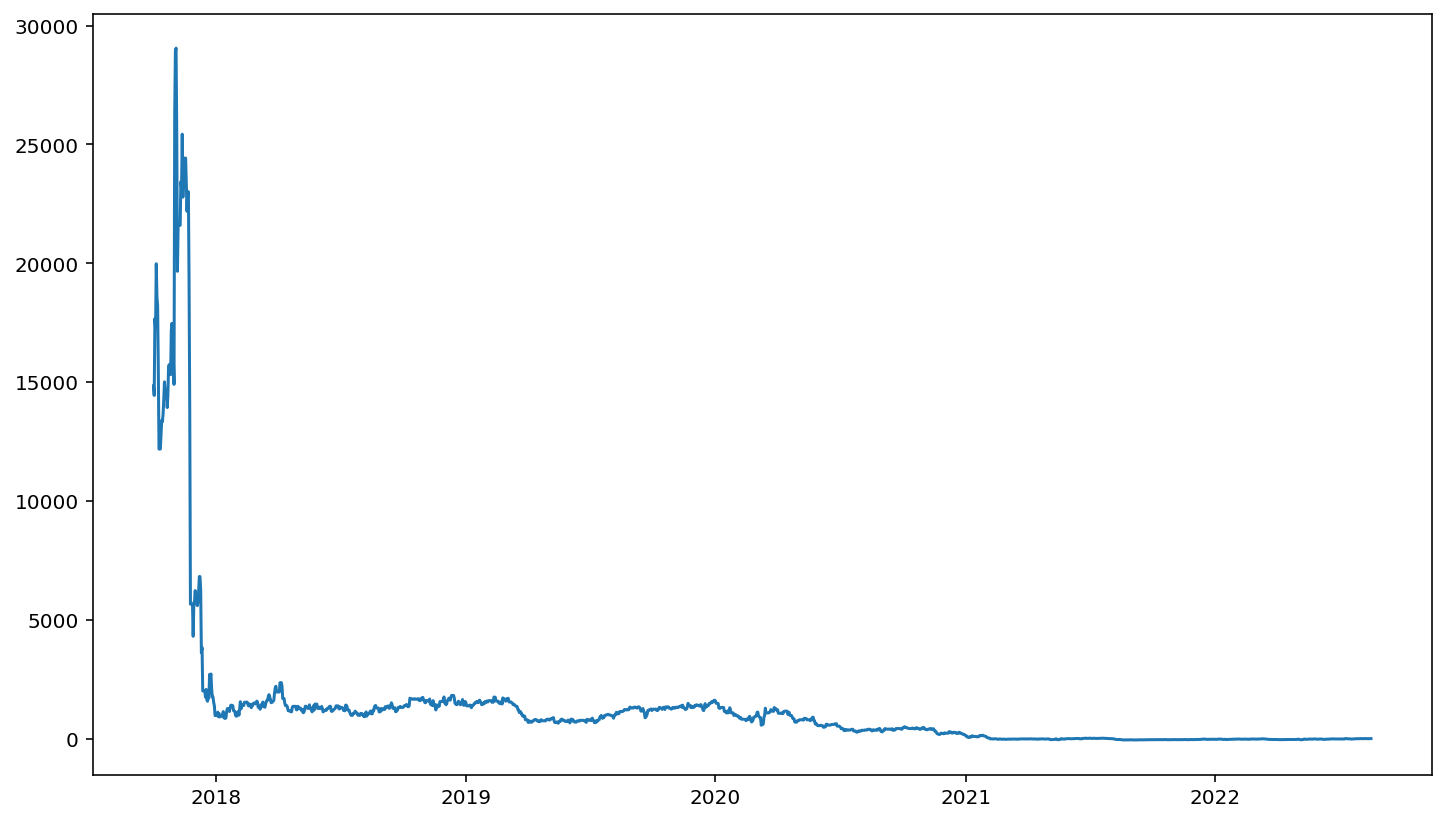

In [6]:
strategy = StrategyTenkanSen()
evalGame = EvalGame(100)

gain6 = evalGame.eval(serie, strategy, iteration=100, debug=False)
print("Le gain est de :" , gain6, "\n")

gain = evalGame.evalTime(serie, strategy, iteration=100, debug=False)
print("Statistiques de notre liste 'gain' :\n", gain.describe(include='all'))

plt.plot(gain)
plt.show()

### Résultat
La fonction tenkansen à l'air particulièrement efficace pour le choix d'achat ou de vente, d'actions.

C'est, jusqu'ici, de loin la méthode la plus efficace.

Calculer une moyenne du prix en se basant sur le prix maximum et minimum sur une durée moyenne ( 9 jours ) semble une très bonne idée, et peut être que calculer la moyenne sur une durée plus longue pourrait être une bonne idée !

### StrategyKijunSen

Ca tombe bien car ici le principe est le même; sauf qu'ici la durée est de 26 jours.

```python
class StrategyKijunSen(IStrategy):

    def __init__(self,name="StrategyKijunSen"):
        super().__init__()

    def getAction(self, game, unityPrice, date, debug=False):

        listTemp = []
        for i in range(26) :
            try :
                listTemp.append(game.prices[abs(game.clock-i)])
            except :
                continue
        minimum = min(listTemp)
        maximum = max(listTemp)
        tenkan = (maximum + minimum) / 2

        if tenkan < unityPrice :
            return (game.BUY, (game.account.cash//unityPrice))

        if tenkan > unityPrice :
            return (game.SELL, (game.account.security))

        return (2, game.account.security)
```

En effet la boucle ` for i in range(26)` est maintenant belle et bien sur 26 jours ( au lieu de 9 ).

Cependant, tout comme pour la méthode originale ( https://fr.wikipedia.org/wiki/Ichimoku_Kinkō_Hyō ), 
la seule différence de KijunSen vis-a-vis de TenkanSen est la durée de l'échantillon, qui passe de 9 jours à 26.



Le gain est de : [24798.38872722606] 



Statistiques de notre liste 'gain' :
 count     1782.000000
mean      1962.936585
std       4528.993685
min        -57.624736
25%         -9.648206
50%       1318.275831
75%       2374.453072
max      44231.545226
dtype: float64


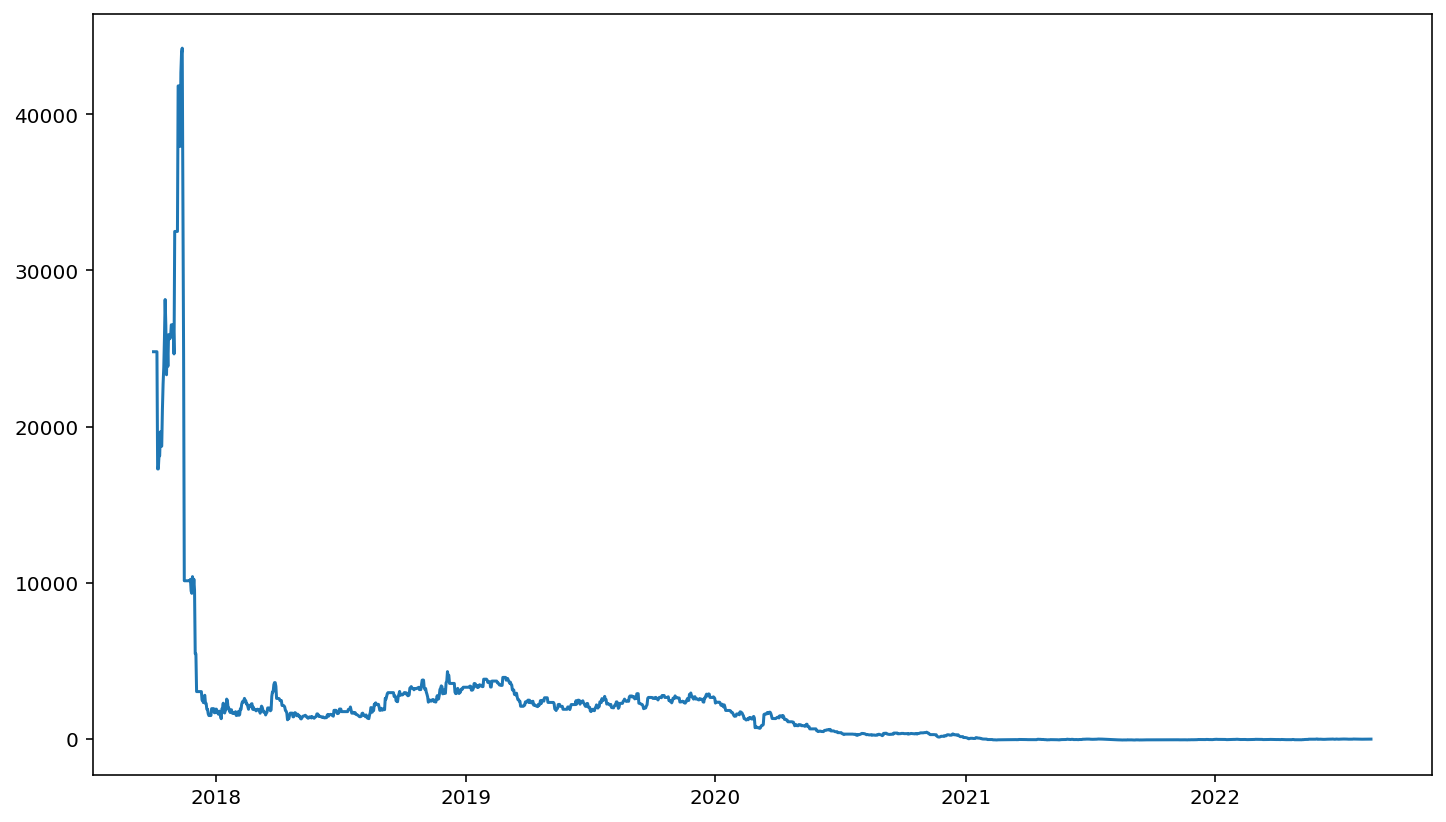

In [7]:
%run -i "Strategies.ipynb"
strategy = StrategyKijunSen()
evalGame = EvalGame(100)

gain7 = evalGame.eval(serie, strategy, iteration=100, debug=False)
print("Le gain est de :" , gain7, "\n")

gain = evalGame.evalTime(serie, strategy, iteration=100, debug=False)
print("Statistiques de notre liste 'gain' :\n", gain.describe(include='all'))

plt.plot(gain)
plt.show()

### Résultat

Le gain est tout simplement le plus élevé, toute méthode confondu ! ( si on enlève StrategyOracle )

Calculer la moyenne entre la valeur la plus haute et la plus basse des 26 derniers jours semblent une encore meilleure idée que de prendre que les 9 derniers jours.

Mais peut être existe-t-il une autre méthode plus efficace encore ?

### StrategyPrimeNumber
Et finalement, la stratégie des nombres premiers.

Le but est d'acheter le maximum d'action uniquement si la date est un nombre premier.

Plus précisément, le but est d'acheter, si le nombre de jours depuis le 1er octobre 2017 est premier.

```python

class StrategyPrimeNumber(IStrategy):

    def __init__(self,name="StrategyPrimeNumber"):
        super().__init__()

    def getAction(self, game, unityPrice, date, debug=False):
        n = game.clock
        if n <= 1:
            return (game.SELL, (game.account.security))
        for i in range(2, int(n**0.5)+1):
            if n % i == 0:
                return (game.SELL, (game.account.security))
        return (game.BUY, (game.account.cash//unityPrice))

```
Ici, le :
```python
for i in range(2, int(n**0.5)+1):
	if n % i == 0:
```
va tout simplement vérifier que le chiffre est premier, si il ne l'est pas alors on vend les actions que l'on a

et si il l'est, alors on achète un maximum d'actions.

Et le :
```python
if n <= 1:
	return (game.SELL, (game.account.security))
```
va tout simplement permettre d'optimiser, en disant que si un chiffre est **inférieur ou égale** à un, alors il n'est pas premier et donc on vend les actions que l'on a.


Le gain est de : [331.0514589427523] 



Statistiques de notre liste 'gain' :
 count    1782.000000
mean       53.279670
std       133.337570
min       -94.945648
25%       -23.170563
50%        11.500079
75%        85.627331
max      1324.672530
dtype: float64


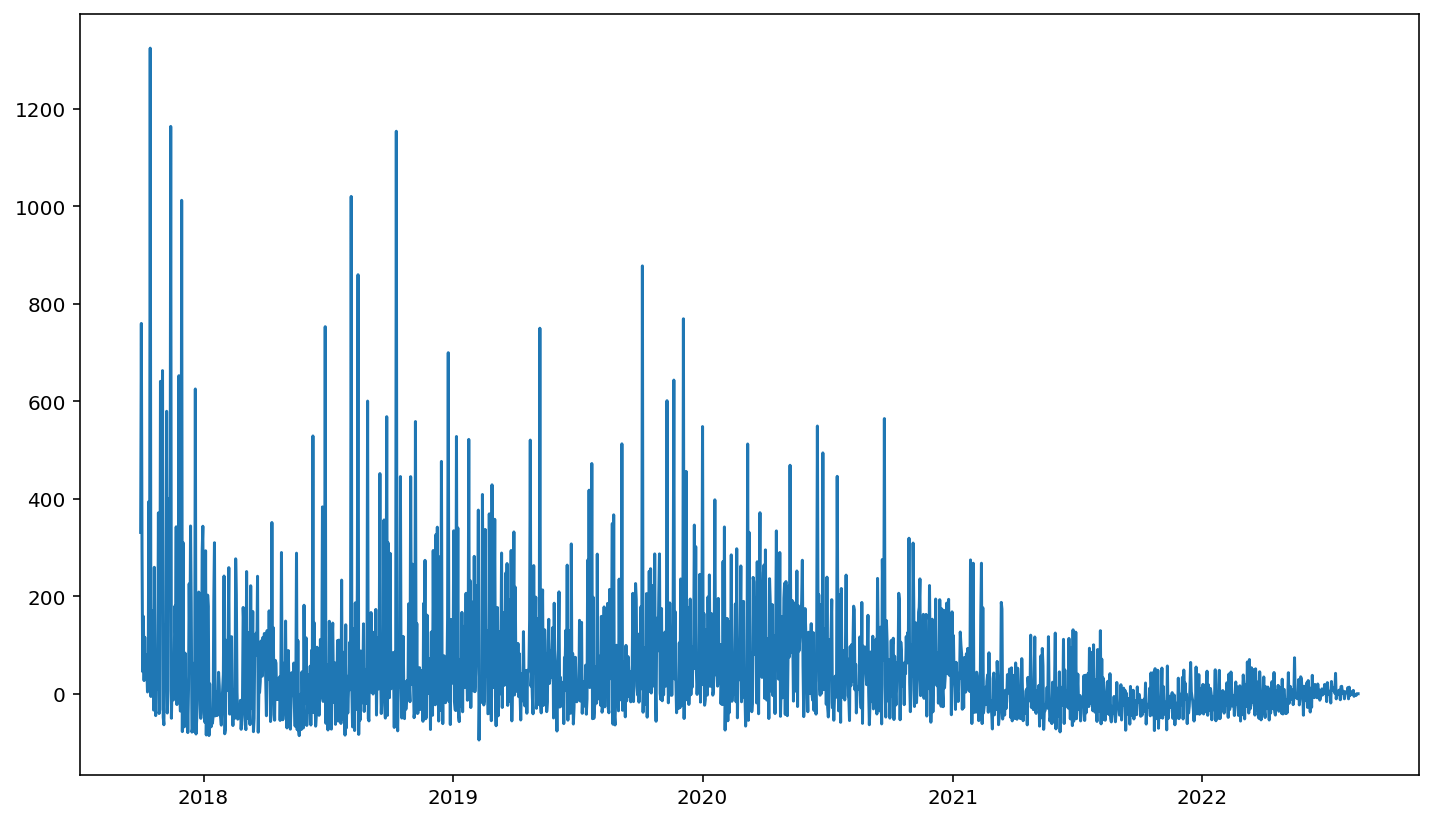

In [8]:
%run -i "Strategies.ipynb"
strategy = StrategyPrimeNumber()
evalGame = EvalGame(100)

gain8 = evalGame.eval(serie, strategy, iteration=100, debug=False)
print("Le gain est de :" , gain8, "\n")

gain = evalGame.evalTime(serie, strategy, iteration=100, debug=False)
print("Statistiques de notre liste 'gain' :\n", gain.describe(include='all'))

plt.plot(gain)
plt.show()

### Résultat

Nous pouvons voir que cette stratégie, a, contrairement à ses confrères purement aléatoires, des résultats constants et positifs.

Le gain est de 300, ce qui est plus que ce que l'on peut penser.

Je pense que ces résultats sont tout simplement dues au fait que les chiffres premiers sont assez rares, et qu'il est donc assez peu commun d'acheter.

Et que donc, vu que les possibilités d'achats sont assez faibles, le portefeuille profite tout simplement de l'augmentation du prix de l'ADA au fur et à mesure du temps.

### Les Meilleurs Stratégies :

- StrategyOracle = 1.4^20
- StrategyKijunSen = 24798
- StrategyTenkanSen = 14841
- StrategyLongTerm = 2123
- StrategyJanvier = 2053
- StrategyPrimeNumber = 331
- StrategyRandom = -15
- StrategyLongTerm = -15

# Conclusion

Nous l'avons vu, certaine stratégie fonctionne très bien contrairement à d'autres qui ne fonctionnent pas du tout.

La meilleur stratégie est sans aucun doute la stratégyoracle qui peut se permettre de tricher et de voir le futur, mais si on l'inclus on se rend compte que les meilleurs stratégies sont des stratégies très connues du monde des finances.

Les stratégies KijunSen et Tenkan étant très utilisé dans les marchés asiatiques.

Ce que nous pouvons retenir c'est que certaines stratégies sont très efficaces ( StrategyTenkanSen, StrategyKijunSen), d'autres sont assez moyens et profite plus de la chance que de véritables atouts financiers ( StrategyLongTerm, StrategyJanvier, StrategyPrileNumber ), et que les stratégies aléatoires sont fidèles à elles mêmes, complétement inconsistantes ( StrategyRandom, StratregyCoinToss ).